##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API Python quickstart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [1]:
!pip install -q -U google-generativeai

## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [2]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

models = genai.list_models()
for model in models:
    print(model.name, model.supported_generation_methods)

models/chat-bison-001 ['generateMessage', 'countMessageTokens']
models/text-bison-001 ['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001 ['embedText', 'countTextTokens']
models/gemini-1.0-pro-latest ['generateContent', 'countTokens']
models/gemini-1.0-pro ['generateContent', 'countTokens']
models/gemini-pro ['generateContent', 'countTokens']
models/gemini-1.0-pro-001 ['generateContent', 'countTokens', 'createTunedModel']
models/gemini-1.0-pro-vision-latest ['generateContent', 'countTokens']
models/gemini-pro-vision ['generateContent', 'countTokens']
models/gemini-1.5-pro-latest ['generateContent', 'countTokens']
models/gemini-1.5-pro-001 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro-002 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro ['generateContent', 'countTokens']
models/gemini-1.5-pro-exp-0801 ['generateContent', 'countTokens']
models/gemini-1.5-pro-exp-0827 ['generateContent', 'c

## Connect to Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fine Tune Model

In [3]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

for model_info in genai.list_tuned_models():
    print(model_info.name)

tunedModels/generate-num-5917
tunedModels/amazonreview-4325
tunedModels/amazonreview-6366
tunedModels/amazonreview-2086
tunedModels/reviewclassifier-g8uk4no67udl
tunedModels/reviewclassifieroptimized-7sqarfnwtg1d
tunedModels/reviewclassifieroptimized-a5zuez0wy92v
tunedModels/reviewclassifieroptimized-w57fciqdwwqw
tunedModels/reviewclassifieroptimized-oo9z4ioizwg3


### Filter Invalid Training Data & Convert Format to the Input Format Gemini API Finetuning Accepts

In [ ]:
import time
import json
import google.generativeai as genai
from google.colab import userdata
import os
import google.generativeai as genai


data = []
with open('/content/drive/MyDrive/CS6220/test_dataset2w.json', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            item = json.loads(line.strip())
            data.append(item)
        except json.JSONDecodeError:
            continue

training_data = []
for example in data:
    try:
        if isinstance(example, dict) and 'reviewText' in example and 'class' in example:
            if isinstance(example['reviewText'], str) and isinstance(example['class'], (int, float)):
                training_data.append({
                    'text_input': example['reviewText'],
                    'output': str(int(example['class']))
                })
    except:
        continue

print(f"Valid examples: {len(training_data)} out of {len(data)}")


In [ ]:
df = pd.DataFrame(training_data)

# Save the DataFrame to a CSV file
output_path = "/content/drive/MyDrive/CS6220/filtered_data2w.csv"
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"Training data saved to {output_path}")

## Train-Test Split


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

csv_file = "/content/drive/MyDrive/CS6220/reviewTextEdit_class.csv"
data = pd.read_csv(csv_file)


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.to_csv("/content/drive/MyDrive/CS6220/train_data.csv", index=False, encoding='utf-8')
test_data.to_csv("/content/drive/MyDrive/CS6220/test_data.csv", index=False, encoding='utf-8')

print("Train and test datasets have been created and saved.")


Train and test datasets have been created and saved.


### Filter Invalid Validation Data & Convert Format to the Input Format Gemini API Finetuning Accepts

In [ ]:
import json
data = []
with open('/content/drive/MyDrive/CS6220/validation_dataset.json', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            item = json.loads(line.strip())
            data.append(item)
        except json.JSONDecodeError:
            continue

validation_data = []
for example in data:
    try:
        if isinstance(example, dict) and 'reviewText' in example and 'class' in example:
            if isinstance(example['reviewText'], str) and isinstance(example['class'], (int, float)):
                validation_data.append({
                    'text_input': example['reviewText'],
                    'output': str(int(example['class']))
                })
    except:
        continue

validation_text_input = [item['text_input'] for item in validation_data]
validation_labels = [int(item['output']) for item in validation_data]

print(f"Valid examples: {len(validation_data)} out of {len(data)}")


In [ ]:
import optuna
from sklearn.metrics import log_loss
import seaborn as sns
import pandas as pd


def compute_validation_loss(model, validation_text_input, validation_labels):

    predictions = []
    for text in validation_text_input:
        prediction = model.generate_content(text,
          safety_settings=[
        {
            "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_HATE_SPEECH",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
            "threshold": "BLOCK_NONE",
        }
    ])
        predictions.append(prediction)

    val_loss = log_loss(validation_labels, predictions)
    return val_loss


def objective(trial):
    epoch_count = trial.suggest_int("epoch_count", 1, 10)
    batch_size = trial.suggest_categorical("batch_size", [4, 8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)

    operation = genai.create_tuned_model(
        display_name="review-classifier-optimized",
        source_model="models/gemini-1.5-flash-001-tuning",
        epoch_count=epoch_count,
        batch_size=batch_size,
        learning_rate=learning_rate,
        training_data=training_data,
    )


    result = operation.result()

    snapshots = pd.DataFrame(result.tuning_task.snapshots)
    sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

    val_loss = compute_validation_loss(result, validation_text_input, validation_labels)
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("Best Parameters:", study.best_params)

In [ ]:
base_model = "models/gemini-1.5-flash-001-tuning"
operation = genai.create_tuned_model(
    display_name="review-classifier",
    source_model=base_model,
    epoch_count=2,
    batch_size=4,
    learning_rate=0.001,
    training_data=training_data,
)

for status in operation.wait_bar():
    time.sleep(10)

result = operation.result()
print("Model Name:", result)

reviewclassifier1 = result.name

model = genai.GenerativeModel(model_name=result.name)
test_review = "The case fits perfectly and provides good protection"
result = model.generate_content(test_review)
print(result.text)

  0%|          | 0/3000 [00:00<?, ?it/s]

TunedModel(name='tunedModels/reviewclassifier-g8uk4no67udl',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='review-classifier',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 11, 12, 0, 45, 42, 653376, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 11, 12, 2, 51, 35, 127299, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 11, 12, 0, 45, 43, 430072, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 11, 12, 2, 51, 35, 127299, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=2,
                                      

In [ ]:
# Use metadata to check the state
operation.metadata

In [ ]:
result = operation.result()
reviewclassifier1 = result.name
print("Tuned Model Name:", result.name)

In [ ]:
# Epoch/Loss Graph
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [ ]:
# Used finetuned model for 1 example
model = genai.GenerativeModel(model_name='tunedModels/reviewclassifier-g8uk4no67udl')
test_review = "The case fits perfectly and provides good protection"
prediction = model.generate_content(test_review)
print(prediction.text)

## Metrics

In [7]:
test_data = test_data[['reviewTextEdit', 'class']]
test_data.to_csv("/content/drive/MyDrive/CS6220/test_data.csv", index=False, encoding='utf-8')
test_data.head()

,reviewTextEdit,class
75721,love great watch size perfect beauti excel qua...,1.0
80184,receiv eggspert deliveri prompt product exactl...,1.0
19864,case came quickli belt loop ad secur need ride...,1.0
76699,bought springfield champion lw load right side...,1.0
92991,bought man cave lair call stand top dvd rack a...,1.0


In [ ]:
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import time

start_time = time.time()

test_data_path = "/content/drive/MyDrive/CS6220/test_data.csv"
test_data = pd.read_csv(test_data_path)

test_data = test_data.dropna(subset=['reviewTextEdit', 'class'])
test_data = test_data.iloc[:1000]

test_texts = test_data['reviewTextEdit']

test_predictions = []
#skipped_indices = []

model = genai.GenerativeModel(model_name='tunedModels/reviewtexteditclassifier-6h9srhkigioq') # models/gemini-1.5-flash-001-tuning

for text in tqdm(test_texts):
  try:
    prediction = model.generate_content(
    text, #f"If the following review is a fake review, return 1, if it's a real review made by customers, return 0. Only return 1 or 0. Do not return any other text. Review: {text}"
    safety_settings=[
        {
            "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_HATE_SPEECH",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
            "threshold": "BLOCK_NONE",
        }
    ]
)
    # print(prediction.text)

    test_predictions.append(prediction.text)
  except ValueError as e:
        print(f"跳过一个输入，原因: {e}")
        #skipped_indices.append(idx)
        test_predictions.append('0')



test_predictions = [int(x) for x in test_predictions]
#valid_texts = test_texts.drop(index=skipped_indices)

test_labels = test_data['class'].astype(int)

end_time = time.time()
runtime = end_time - start_time
print(f"Total Runtime: {runtime:.2f} s")

results_df = pd.DataFrame({
    "reviewTextEdit": test_texts,
    "Prediction": test_predictions
})

print(results_df.head())

output_path = "/content/drive/MyDrive/CS6220/predictions_results.csv"
results_df.to_csv(output_path, index=False, encoding='utf-8')

print(f"CSV saved to {output_path}")


In [16]:
test_predictions = [int(x) for x in test_predictions]
test_data = test_data.iloc[:337]
test_labels = test_data['class'].astype(int)

accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8872
Precision: 0.9007
Recall: 0.8411


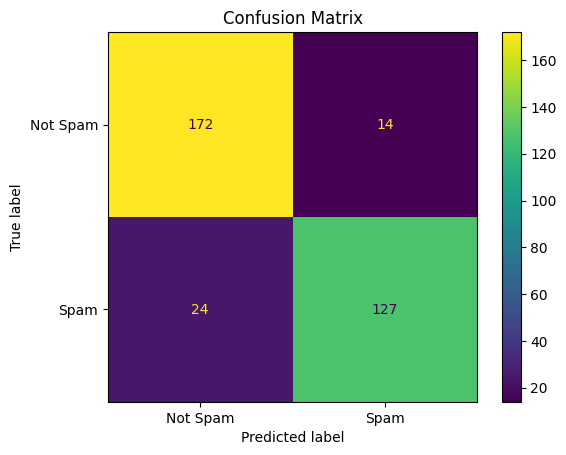

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, test_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam", "Spam"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

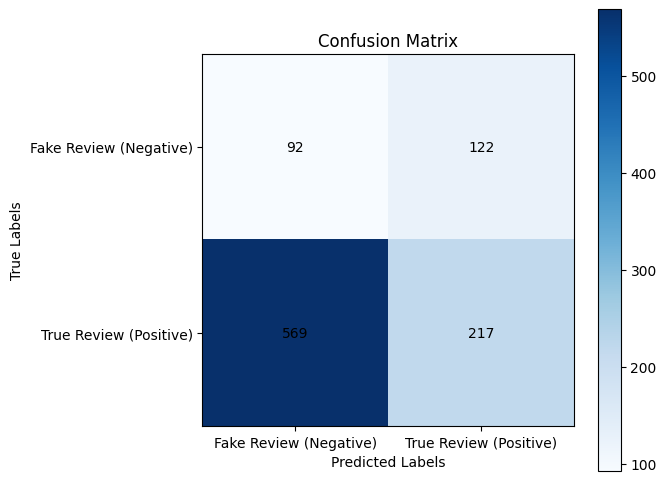

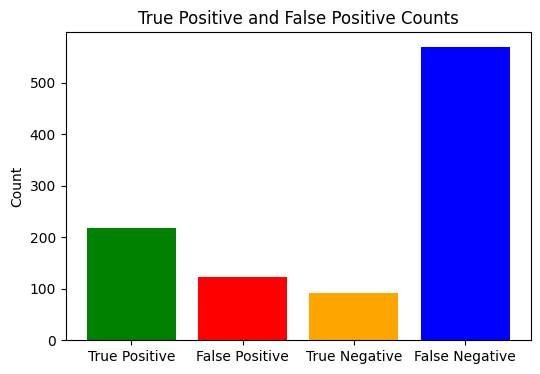

In [ ]:
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Fake Review (Negative)", "True Review (Positive)"])
plt.yticks([0, 1], ["Fake Review (Negative)", "True Review (Positive)"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="black")

plt.show()

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

plt.figure(figsize=(6, 4))
plt.bar(['True Positive', 'False Positive', 'True Negative', 'False Negative'], [TP, FP, TN, FN], color=['green', 'red', 'orange', 'blue'])
plt.ylabel("Count")
plt.title("True Positive and False Positive Counts")
plt.show()
